<a href="https://colab.research.google.com/github/nascimento-luciano/Artificial-Intelligence/blob/master/Lista3_Exercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O código abaixo gera um dataset com 40 séries de treinamento e 16 séries de teste e o salva em um arquivo .h5. Esse dataset é composto por 4 polinômios diferentes (t^0; t^1; t^2; t^3) mais ruido gaussiano.

(224, 30)


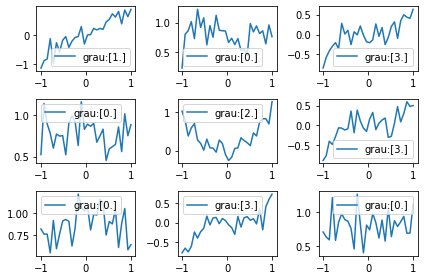

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import h5py

#gera o data set com as funções t^0; t^1; t^2; t^3
N_class=4
s_p=30                                                                           #quantos pontos os dados de entrada tem
s_d=N_class*10                                                                   #quantos exemplos tem meu Dtrain
s_t=N_class*4                                                                    #quantos exemplos para teste
p_r = 0.2                                                                        #porcentagem de ruido 
t=np.linspace(-1,1,s_p)                                                          #define a escala de tempo

#dados de treinamento e teste
xtudo = np.empty((0,s_p),float)                                                  #inicializa as entradas
ytudo = np.empty((0,1),float)
for q_pol in range(0,N_class):
  matriz_polinomios=(1-p_r)*(np.ones([s_d+s_t,1])*t**q_pol)                      #cria os vetores
  matriz_pol_com_ruido=matriz_polinomios+p_r*np.random.normal(0,1,[s_d+s_t,s_p])
  xtudo = np.append(xtudo, matriz_pol_com_ruido, axis=0)
  matriz_graus = np.ones([s_d+s_t,1])*q_pol
  ytudo = np.append(ytudo, matriz_graus,axis=0)
tudo = np.append(xtudo, ytudo, axis=1)
tudo_misturado=tf.random.shuffle(tudo, seed=None, name=None)
lista_tudo_misturado=np.split(tudo_misturado, [s_p,s_p+1], axis=1)
xdata=lista_tudo_misturado[0]
ydata=lista_tudo_misturado[1]
print(xtudo.shape)

#mostra alguns dados
plt.figure()
for nn in range (0,9):
  plt.subplot(3,3,nn+1)
  plt.plot(t,xdata[nn,:])
  plt.legend(['grau:'+str(ydata[nn])])
plt.tight_layout()

#salva o dataset
with h5py.File('poli_data_set.h5','w') as hf:
   hf.create_dataset("tempo", data=t)
   hf.create_dataset("xdata", data=xdata)
   hf.create_dataset("ydata", data=ydata)
   hf.create_dataset("data_info", data=[s_p,s_d,s_t,N_class])

a) Crie e treine uma rede neural para classificação multi-classe para identificar esses polinômios para p_r=0,2.

dados do arquivo: ['data_info', 'tempo', 'xdata', 'ydata']
Model: "Rede_MultiClasse"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 12)                372       
                                                                 
 dense_9 (Dense)             (None, 4)                 52        
                                                                 
Total params: 424
Trainable params: 424
Non-trainable params: 0
_________________________________________________________________
None
shape xtrain= (30, 30)
shape ytrain= (30, 1)


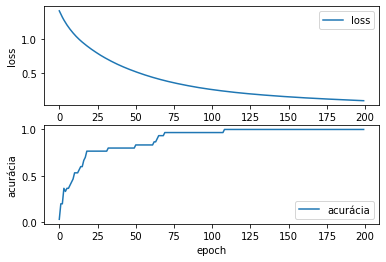

1/1 - 0s - loss: 0.2555 - accuracy: 1.0000 - 109ms/epoch - 109ms/step
Accuracy: 100.00
[[2.5252718e-02 3.5656670e-01 7.8552380e-02 5.3962821e-01]
 [1.1348338e-02 1.4301434e-03 9.8520130e-01 2.0201344e-03]
 [9.7019053e-01 4.9801009e-05 2.9472699e-02 2.8697940e-04]
 [1.2836053e-02 7.8467470e-01 3.3704566e-03 1.9911873e-01]
 [8.8495556e-03 6.3091612e-01 6.1746342e-03 3.5405964e-01]
 [6.9120200e-03 6.6473830e-04 9.9137199e-01 1.0511811e-03]
 [9.5529515e-01 9.6454787e-06 4.4648603e-02 4.6553898e-05]
 [2.2722850e-02 4.7246960e-01 2.9116571e-02 4.7569093e-01]
 [5.3640381e-03 6.9245821e-01 4.7761686e-03 2.9740158e-01]
 [2.0465732e-02 2.0436572e-03 9.7573757e-01 1.7530535e-03]]
data e predição = 
 [[3. 3.]
 [2. 2.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [2. 2.]
 [0. 0.]
 [3. 3.]
 [1. 1.]
 [2. 2.]]


In [10]:
#Código para a classificação do multi-classe
#Importanto o dataset
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import h5py

#carrega o dataset de "poli_data_set.h5"
with h5py.File('poli_data_set.h5', 'r') as hf:
  print('dados do arquivo:',list(hf.keys()))
  [s_p, s_d, s_t, N_classe]=hf["data_info"][:]
  y=hf['ydata'][:]
  x=hf['xdata'][:]

xlista=np.split(x,[s_p, s_d, s_t], axis=0)
ylista=np.split(y,[s_p, s_d, s_t], axis=0)    

xtrain=xlista[0];xtest=xlista[1]
ytrain=ylista[0];ytest=ylista[1]

#Construção da rede neural
model=tf.keras.Sequential([
      tf.keras.layers.Dense(12, input_dim=s_p, activation='relu'),
      tf.keras.layers.Dense(N_class, activation='softmax')],name='Rede_MultiClasse') 

#Compilação da rede neural
opt=tf.keras.optimizers.Adam(learning_rate=0.002)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

#Treinamento da rede neural com o data set
print('shape xtrain=', np.shape(xtrain)); 
print('shape ytrain=', np.shape(ytrain));
history=model.fit(xtrain, ytrain, epochs=200,verbose=0)

#mostra o loss e a acuracia durante o treinamento
plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.ylabel('loss');plt.xlabel('epoch')
plt.legend(['loss'], loc='upper right')
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.ylabel('acurácia');plt.xlabel('epoch')
plt.legend(['acurácia'],loc='lower right')
plt.show()

#Exibição da Acuracia
_,test_accuracy=model.evaluate(xtest, ytest, verbose=2)
print('Accuracy: %.2f' % (test_accuracy*100))

#Previsões por meio da rede treinada
ypred_prob=model.predict(xtest)
ypred=np.argmax(ypred_prob,axis=1)
print(ypred_prob)

#Apresentação dos resultados
print('data e predição = \n', np.concatenate((ytest, ypred [None].T), axis=1))

b) Mantenha a rede como está e altere a porcentagem de ruido p_r, e calculando a accurária dos teste faça um gráfico da acuraria em função de p_r;

(224, 30)


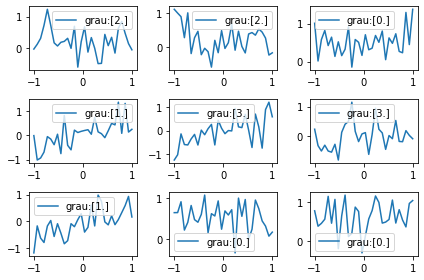

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import h5py

#gera o data set com as funções t^0; t^1; t^2; t^3
N_class=4
s_p=30                                                                           #quantos pontos os dados de entrada tem
s_d=N_class*10                                                                   #quantos exemplos tem meu Dtrain
s_t=N_class*4                                                                    #quantos exemplos para teste

#O valor de p_r foi alterado para 0.5
p_r = 0.4                                                                        #porcentagem de ruido 

t=np.linspace(-1,1,s_p)                                                          #define a escala de tempo

#dados de treinamento e teste
xtudo = np.empty((0,s_p),float)                                                  #inicializa as entradas
ytudo = np.empty((0,1),float)
for q_pol in range(0,N_class):
  matriz_polinomios=(1-p_r)*(np.ones([s_d+s_t,1])*t**q_pol)                      #cria os vetores
  matriz_pol_com_ruido=matriz_polinomios+p_r*np.random.normal(0,1,[s_d+s_t,s_p])
  xtudo = np.append(xtudo, matriz_pol_com_ruido, axis=0)
  matriz_graus = np.ones([s_d+s_t,1])*q_pol
  ytudo = np.append(ytudo, matriz_graus,axis=0)
tudo = np.append(xtudo, ytudo, axis=1)
tudo_misturado=tf.random.shuffle(tudo, seed=None, name=None)
lista_tudo_misturado=np.split(tudo_misturado, [s_p,s_p+1], axis=1)
xdata=lista_tudo_misturado[0]
ydata=lista_tudo_misturado[1]
print(xtudo.shape)

#mostra alguns dados
plt.figure()
for nn in range (0,9):
  plt.subplot(3,3,nn+1)
  plt.plot(t,xdata[nn,:])
  plt.legend(['grau:'+str(ydata[nn])])
plt.tight_layout()

#salva o dataset
with h5py.File('poli_data_set.h5','w') as hf:
   hf.create_dataset("tempo", data=t)
   hf.create_dataset("xdata", data=xdata)
   hf.create_dataset("ydata", data=ydata)
   hf.create_dataset("data_info", data=[s_p,s_d,s_t,N_class])

dados do arquivo: ['data_info', 'tempo', 'xdata', 'ydata']
Model: "Rede_MultiClasse"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 12)                372       
                                                                 
 dense_17 (Dense)            (None, 4)                 52        
                                                                 
Total params: 424
Trainable params: 424
Non-trainable params: 0
_________________________________________________________________
None
shape xtrain= (30, 30)
shape ytrain= (30, 1)


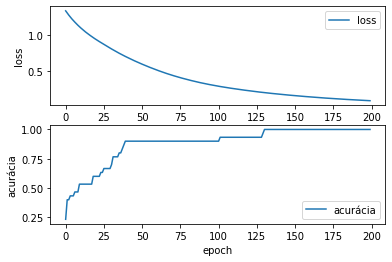

1/1 - 0s - loss: 0.4624 - accuracy: 0.8000 - 106ms/epoch - 106ms/step
Accuracy: 80.00
[[0.01634704 0.8707638  0.09355295 0.01933626]
 [0.07830327 0.70532113 0.03306401 0.18331154]
 [0.13088171 0.79530287 0.01506837 0.05874705]
 [0.03245871 0.8490501  0.03732745 0.08116373]
 [0.97363496 0.00361309 0.02080962 0.00194225]
 [0.00923852 0.72268564 0.15395674 0.11411913]
 [0.9753856  0.01276173 0.00731307 0.00453954]
 [0.17293744 0.05048945 0.6791769  0.09739622]
 [0.00329899 0.90600824 0.02073139 0.06996143]
 [0.02090076 0.1596098  0.6038902  0.21559922]]
data e predição = 
 [[1. 1.]
 [3. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [2. 2.]
 [1. 1.]
 [3. 2.]]


In [18]:
#Código para a classificação do multi-classe
#Importanto o dataset
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import h5py

#carrega o dataset de "poli_data_set.h5"
with h5py.File('poli_data_set.h5', 'r') as hf:
  print('dados do arquivo:',list(hf.keys()))
  [s_p, s_d, s_t, N_classe]=hf["data_info"][:]
  y=hf['ydata'][:]
  x=hf['xdata'][:]

xlista=np.split(x,[s_p, s_d, s_t], axis=0)
ylista=np.split(y,[s_p, s_d, s_t], axis=0)    

xtrain=xlista[0];xtest=xlista[1]
ytrain=ylista[0];ytest=ylista[1]

#Construção da rede neural
model=tf.keras.Sequential([
      tf.keras.layers.Dense(12, input_dim=s_p, activation='relu'),
      tf.keras.layers.Dense(N_class, activation='softmax')],name='Rede_MultiClasse') 

#Compilação da rede neural
opt=tf.keras.optimizers.Adam(learning_rate=0.002)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

#Treinamento da rede neural com o data set
print('shape xtrain=', np.shape(xtrain)); 
print('shape ytrain=', np.shape(ytrain));
history=model.fit(xtrain, ytrain, epochs=200,verbose=0)

#mostra o loss e a acuracia durante o treinamento
plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.ylabel('loss');plt.xlabel('epoch')
plt.legend(['loss'], loc='upper right')
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.ylabel('acurácia');plt.xlabel('epoch')
plt.legend(['acurácia'],loc='lower right')
plt.show()

#Exibição da Acuracia
_,test_accuracy=model.evaluate(xtest, ytest, verbose=2)
print('Accuracy: %.2f' % (test_accuracy*100))

#Previsões por meio da rede treinada
ypred_prob=model.predict(xtest)
ypred=np.argmax(ypred_prob,axis=1)
print(ypred_prob)

#Apresentação dos resultados
print('data e predição = \n', np.concatenate((ytest, ypred [None].T), axis=1))